### Simple to complex linear regression models to predict house prices.

## 1. Importing all necessary packages for this task in python 

In [1]:
import numpy as np  # - this is the numpy package imported and represented as np 
import pandas as pd  # - this is the pandas package imported and represented as pd
import matplotlib.pyplot as plt  # - this is the pyplot function of matplot library package imported and represented
                                 # - as pd
import seaborn as sns # - seaborn package
import os
import scipy.stats as st # for statistics
%matplotlib inline
import statsmodels.api as sm
import matplotlib.ticker as mticker

In [2]:
# importing sci-kit learn(sklearn) package for machine learning in python:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler,MinMaxScaler

## 2. Reading in our csv file that holds our dataset

In [3]:
# here we assign the read in csv file to the variable name 'df'.

df = pd.read_csv('/Users/mac/Downloads/AI_coursework/houseprice_data.csv')

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Data Preprocessing Stage 
#### In this stage we check to see that our data set is in a good shape for our model, its important to note that our model doesnt take in null values and also character string values,so if there is one we will make sure to remedy them

In [5]:
df.info()
# this command checks for our data set information we can see its data types and non- null value count
# here we can see our data set has 21613 entries which can also be said to be rows.
# we can see we have no null values and also no string values hence we can say our data is okay for our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [6]:
# to clearly check and pinpoint our null values in each features 
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 4. Exploratory Analysis Stage
#### in this stage we try to get insights from our data set to better understand what we want to achieve with our model

In [7]:
# we get more insight by using the describe method , we see the min, max, mean etc of all our features(columns)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# here since we didnt have a location feature, i decided to use the longitude and latitude features to 
# see the areas in king county where most of the houses are located, 
# we can see below that its in longtitude range of (-122.4 to -121.4) and latitude range (47.2 to 47.8)
# Interesting point in the plot is that most of these houses price are in the range of 0 to about 1.5 million dollars
# the plot below is a scattered plot done with the seaborn package noted as sns

<AxesSubplot:xlabel='lat', ylabel='long'>

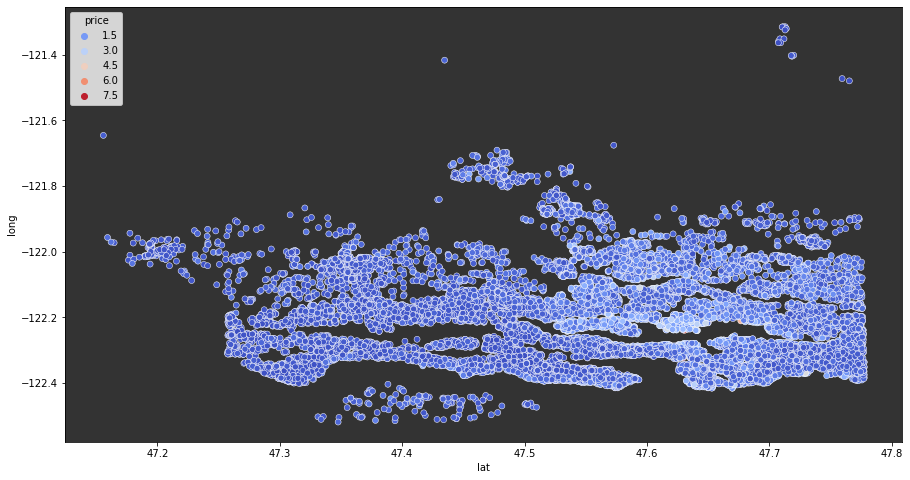

In [80]:
plt.figure(figsize=(15,8))
# Define a dark gray background color
background_color = '#333333'
plt.gca().set_facecolor(background_color) 
sns.scatterplot(x = df['lat'], y = df['long'], data = df, hue = df['price'], palette = 'coolwarm')

##### 4.1 more on Exploratory analysis using value count method to get more insights from some of our features 

In [10]:
# finding the value count of floor and putting it in a dataframe 
array_format = df['floors'].value_counts().sort_index(ascending=False)
dataframe_format = df['floors'].value_counts().to_frame()
print(array_format)
dataframe_format

# here we can see most of the house had a floor of 1 which can equate to 1 storey building

3.5        8
3.0      613
2.5      161
2.0     8241
1.5     1910
1.0    10680
Name: floors, dtype: int64


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [11]:
# repeated value count for  view
df['view'].value_counts().sort_index(ascending=False)
# most of the houses had a no good view , hence view == 0 in this case 

4      319
3      510
2      963
1      332
0    19489
Name: view, dtype: int64

In [12]:
df['waterfront'].value_counts().sort_index(ascending=False)
# most of the houses isnt located to a waterfront, hence waterfront == 0 in this case 

1      163
0    21450
Name: waterfront, dtype: int64

In [13]:
df['zipcode'].value_counts().sort_index(ascending=False)
# no much insight from zipcode , which can relate to all the house being in king county

98199    317
98198    280
98188    136
98178    262
98177    255
        ... 
98005    168
98004    317
98003    280
98002    199
98001    362
Name: zipcode, Length: 70, dtype: int64

In [14]:
df['grade'].value_counts().sort_index(ascending=False)
# the output shows that an average of the house has a good grade, with grade ranking from 1 to 13

13      13
12      90
11     399
10    1134
9     2615
8     6068
7     8981
6     2038
5      242
4       29
3        3
1        1
Name: grade, dtype: int64

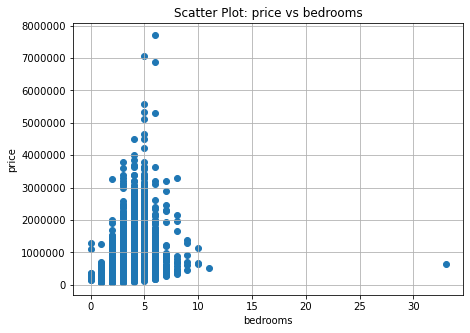

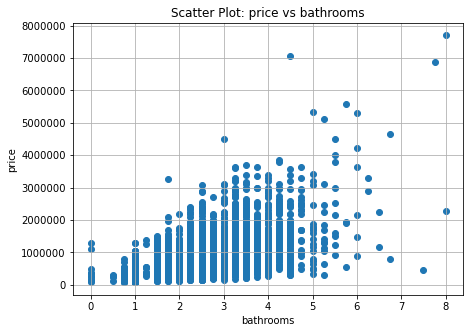

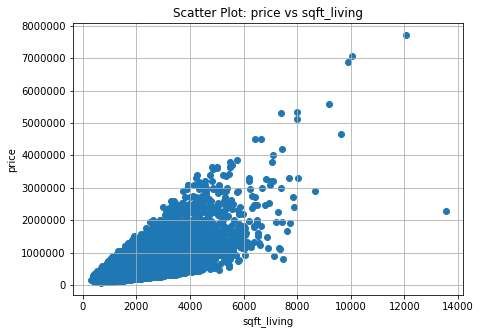

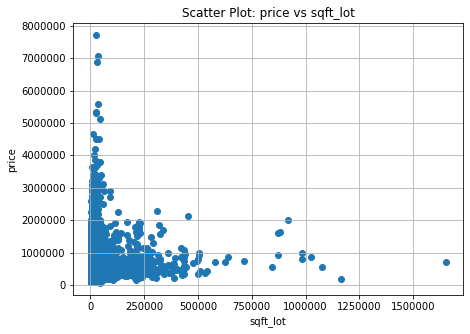

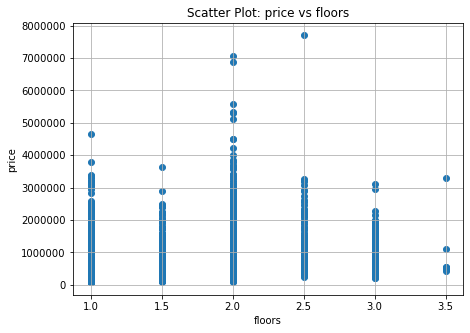

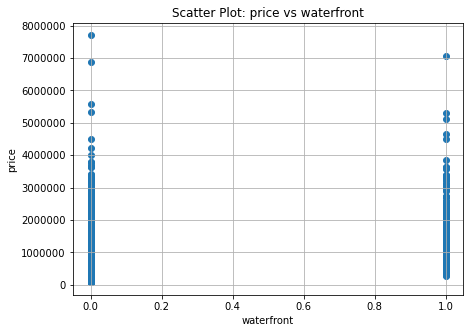

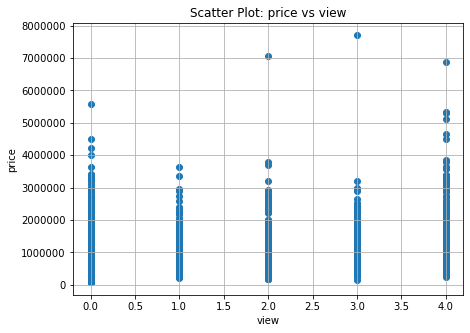

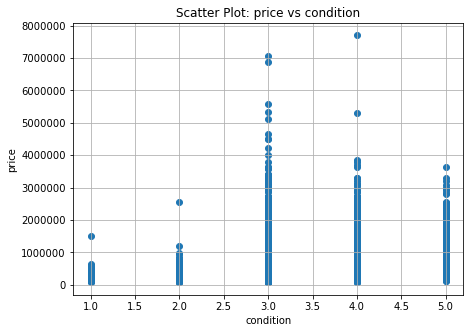

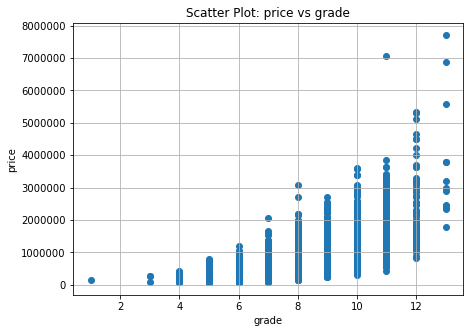

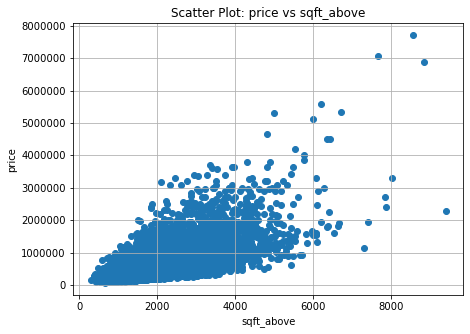

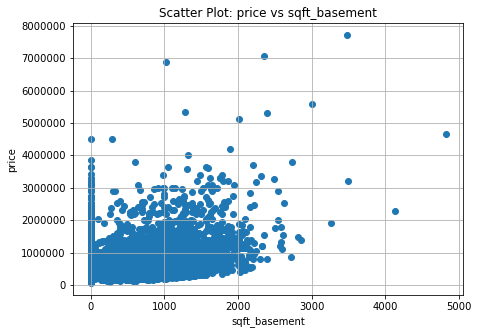

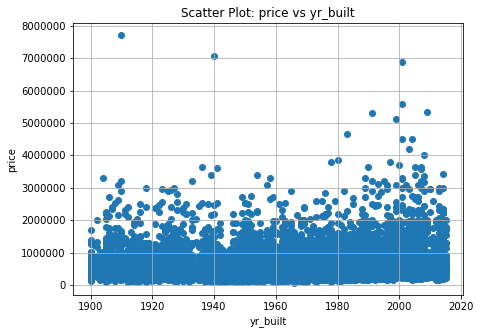

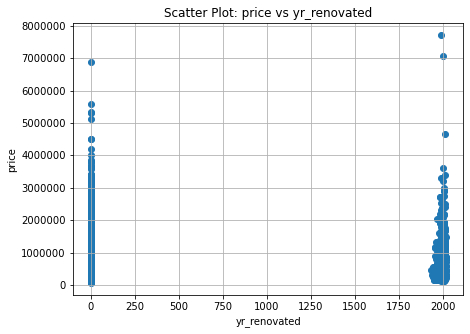

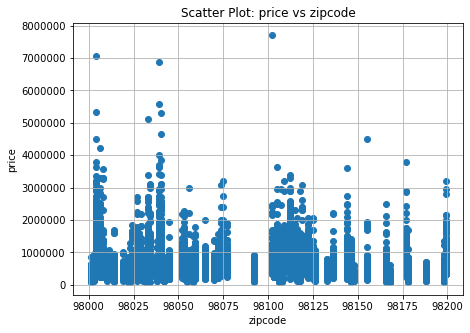

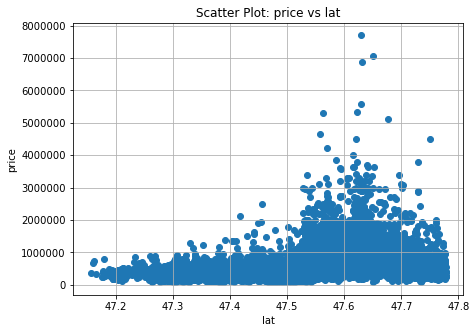

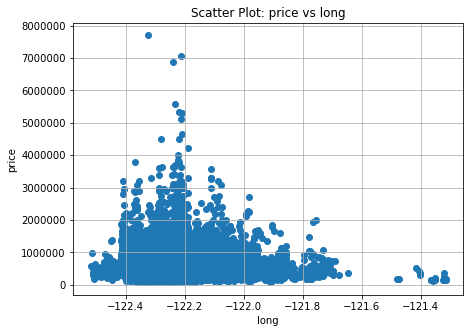

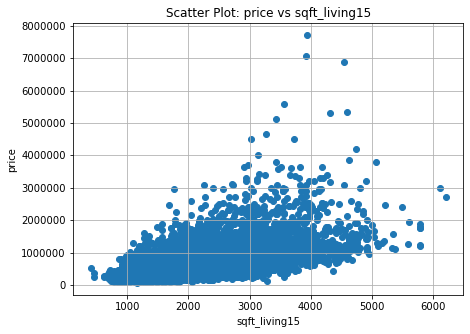

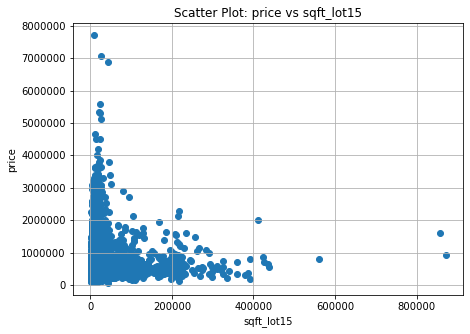

In [15]:
# this is my sample for scattered plot that skips the price column , because we plot other columns against price
# this helps to understand each feature with price
for i in df: # for loop
    if (i != 'price'):
        plt.figure(figsize=(7,5)) # figure size
        plt.scatter(df[i], df['price'])  #scatter plot of each column against price
        plt.xlabel(i)
        plt.ylabel('price')
        plt.title(f'Scatter Plot: price vs {i}')
        plt.grid(True)
        plt.ticklabel_format(useOffset=False, style='plain') # want to display the full numbers in price range
        plt.show()

##### 4.2 WE use the histogram plot to see how all our features are distributed

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

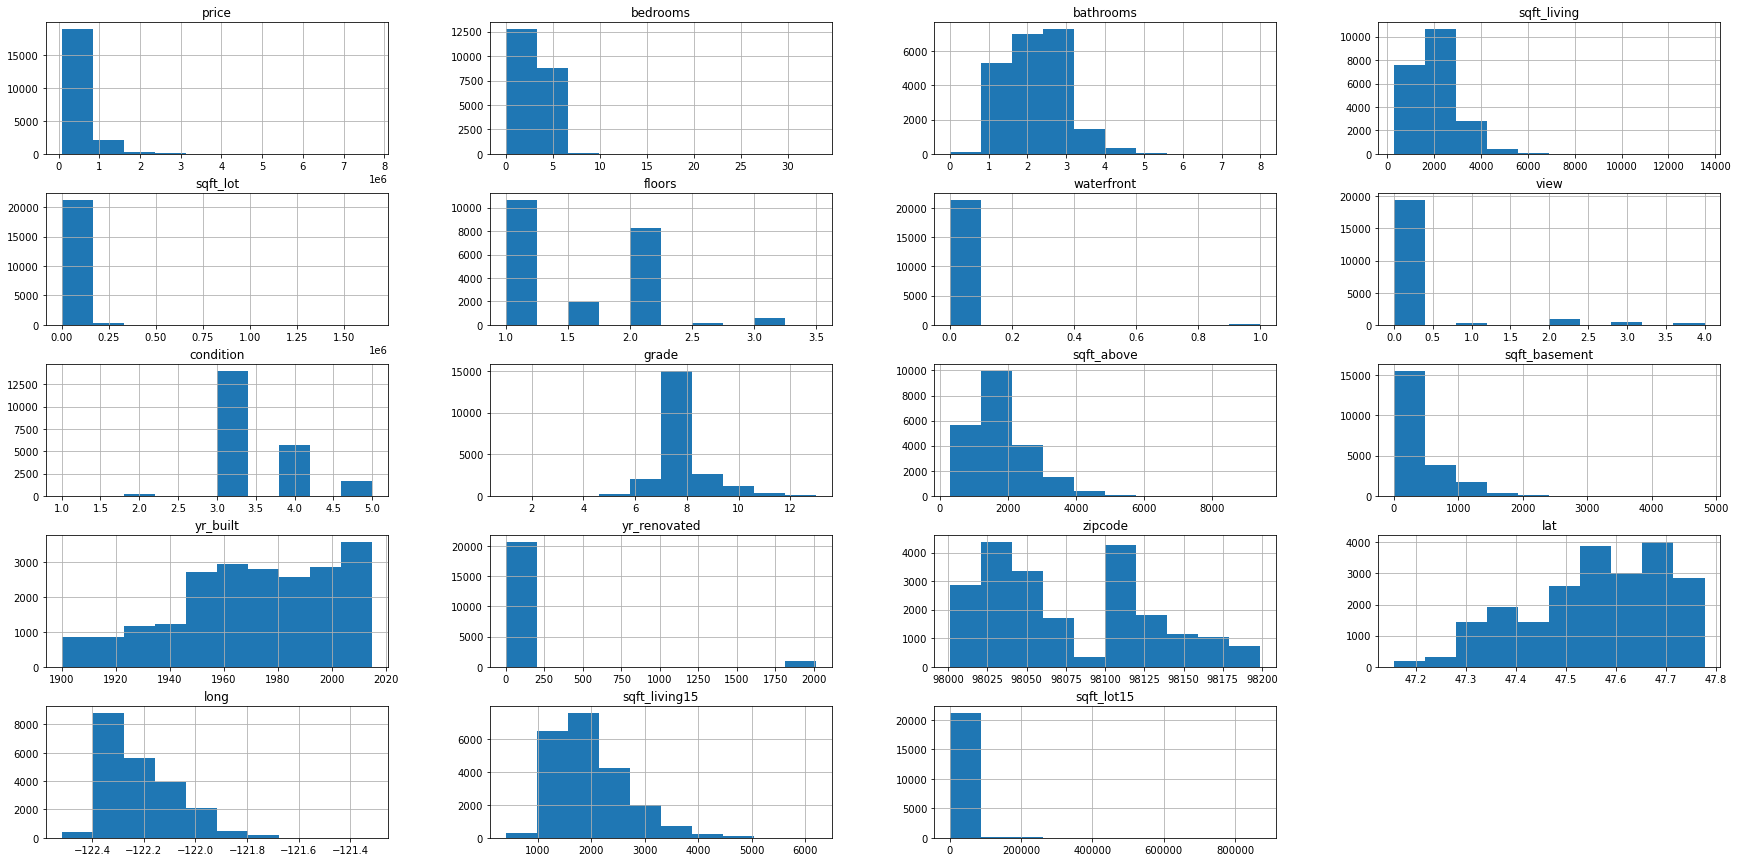

In [16]:
df.iloc[:, :20].hist(figsize=(30, 15))

###### from this histogram plot above we can see that most of our features do not have a normal distribution, this can be an issue that might affect our models performance, but for now we continue.

##### 4.3 Correlation matrix to help us determine how significant all features are in relation to our target feature (price)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

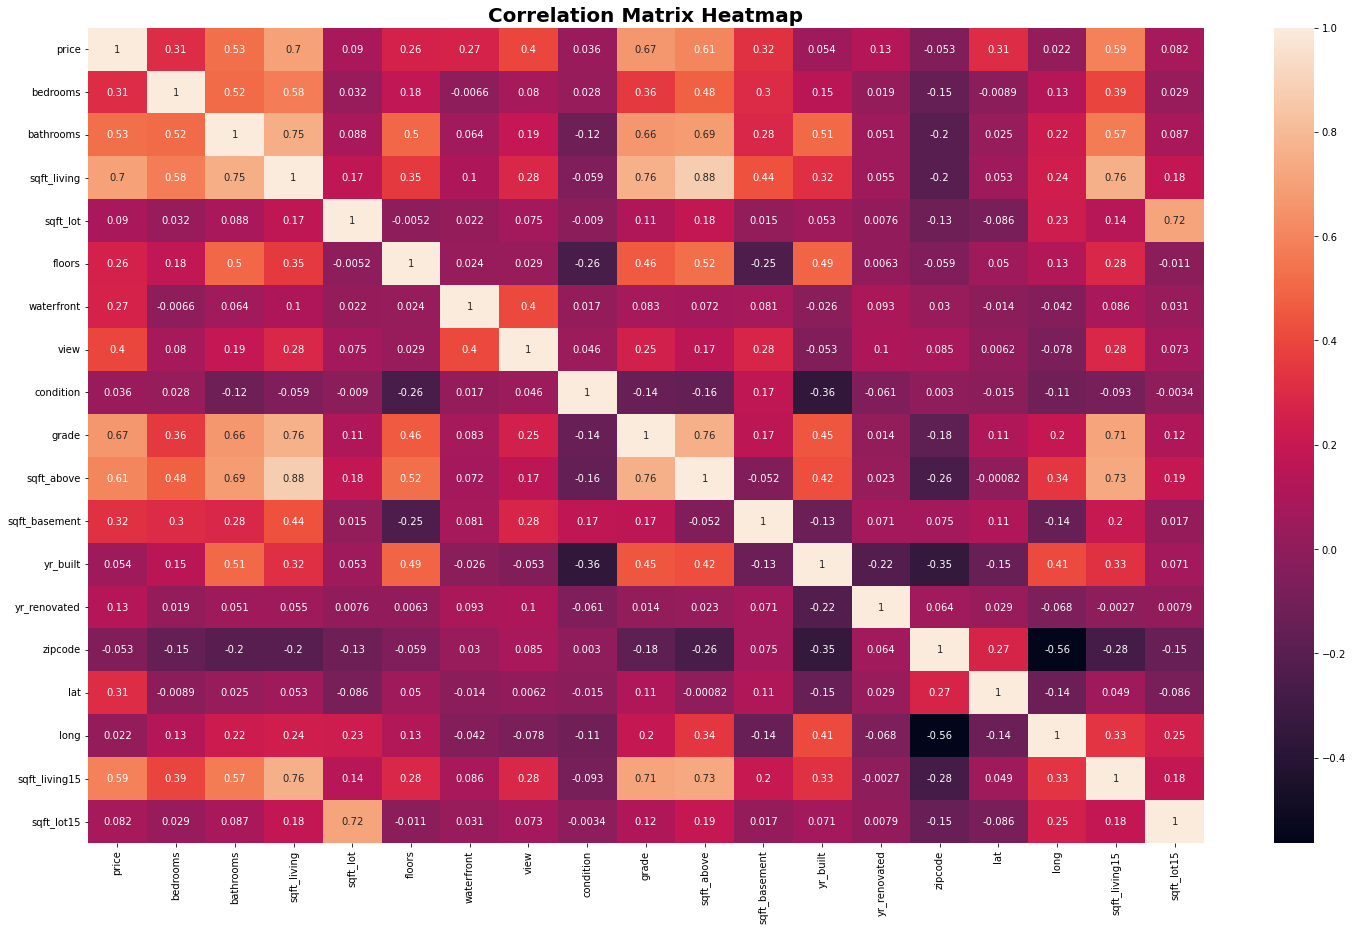

In [17]:
plt.figure(figsize=(25,15)) # this assigns the size of our plot 
sns.heatmap(df.corr(), annot = True) # here we use seaborn to plot our correlation and annoting it with the numbers
plt.title('Correlation Matrix Heatmap', fontsize=20, fontweight='bold') # the title here 

######  here we can see that there are features with high positive correlation to price such as the 'sqft_living', 'grade', 'bathrooms' features, there are also ones with good positive correlation and also negative correlation.
###### it is important to point out that there are also features with high positive correlation with other features , such as 'sqft_living' and 'sqft_living15' which can be because they talked about same thing but recorded in different year when the house might have undergone some renovation.

## 5. Begin building our model 
##### we start with simple models to see what effect they can have in predicting price 

## 5.1- simpe linear model with  its visualisation

##### a) here we create a function that executes a simple linear model algorithm for our choosen variables (X being any of our independent variable and y being our target variable(price) )

##### b) this function also creates plots that helps us visualise the relationship of our independent variable against our target variable 

##### c) this function 'single_feature_model' was created so we can be able to re-use this simple linear regression algorithm without having to write the same code over and over again , here making it easy to see how each of the 18 features in our data perform in predicting house price in our model 

In [18]:
def single_feature_model(X, y): # defining our function and the arguments it takes 
    
    # Get the column names and values of X and y
    
    x_column = X.columns[0]
    y_column = y.columns[0]  
    
    
    # We split our X & y into train and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state =0)
    
    
    # We call our regression model(linear) function and fits it to our training data sets 
    #   here 'lm' is our choosen name for our model which stands for linear model
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    
    # we check the intercept 
    print("intercept:", lm.intercept_)
    
    # we check the coefficient
    print("coefficient:", lm.coef_)
    
    # we check the performance of our model on the training sets to help us understand our model 
    print('training data_score using lm.score: %.4f' % lm.score(X_train, y_train) , '\n')
    
    # we do the same on our testing set
    print('test_data set score using lm.score: %.4f' % lm.score(X_test, y_test) , '\n')
    
    # we check the performance with the R2_score function on test set for better understanding
    print('Coefficient of Determination (R2_score) using r2_score: %.4f' % r2_score(y_test, lm.predict(X_test)), '\n')
    
    # we check our margin of error with the mean squared error function
    print('Mean Squared error: %.8f' % mean_squared_error(y_test, lm.predict(X_test)), '\n')
    


    # WE MAKE DIFFERENT VISUALISATIONS INORDER TO BETTER UNDERSTAND OUR MODEL 
#  -------------------------------------------------------------------------------------------------------

    # i - Add the boxplot, helps in detecting outliers in our variables 
    
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.boxplot(x = x_column, y= y_column, data = df, ax = ax)
    ax.set_ylim(0, 8000000)
    ax.yaxis.get_major_formatter().set_scientific(False)
    # Rotate x-axis labels by 45 degrees
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90)
    ax.set(title=f'Box Plot Price vs. {x_column}')
    
#  -------------------------------------------------------------------------------------------------------

   # ii - A scattered plot for the initial data set X and y to see its distributions
    
    fig1, ax1 = plt.subplots()  # - fig1 stands for the figure , ax1 stands for the axis of the graph
                                # -              here we assign the subplot function to both variable 

    ax1.scatter(X, y, color = "blue")   # - here the ax1 variable implements the scatter method which takes 
                                        # - in values of X and y and also the keyword arg of color with the 
                                        # - value of blue 

    ax1.set_xlabel(x_column) # - sets the label of the x axis to the column name of x
    ax1.set_ylabel(y_column) # - sets the label of the y axis to the column name of y
    ax1.yaxis.get_major_formatter().set_scientific(False)
    ax1.set(title=f'Scattered Plot of Initial Data Set, Price vs. {x_column}')
    fig1.savefig(f'{x_column}_full.png')

#  -------------------------------------------------------------------------------------------------------
    
   # iii - plotting our regression line on the training data set 
    
    fig3, ax3 = plt.subplots()        #- creates a new figure and also single axis for the graph
    
    ax3.scatter(X_train, y_train, color = 'green')  # -  creates a scattered plot with xtrain as x axis  
                                                    # -  and ytrain as y axis, gives it color of green

    ax3.plot(X_train.values, lm.predict(X_train), color='black') # - this code creates a line on the same graph 
                                                                 # using the actual X_train as x axis and model   
                                                                 # target value based upon x_train as y axis.
                                                                 # this is the linear regression line.

            
    ax3.set_xlabel(x_column) # - sets the lable of the x axis to the column name of X
    ax3.set_ylabel(y_column) # - sets the lable of the y axis to the column name of y
    ax3.yaxis.get_major_formatter().set_scientific(False)
    ax3.set(title=f'Plotting Regression Line on train set,  Price vs. {x_column}')
    fig3.savefig(f'{x_column}_train.png')

#   -------------------------------------------------------------------------------------------------------

    # iv - plotting our regression line on the test data set 

    fig4, ax4 = plt.subplots()          # - creates a new figure and also single axis for the graph
    
    ax4.scatter(X_test, y_test, color = 'yellow')  # - creates a scattered plot with Xtest as x axis 
                                                   # - and ytrain y axis, gives it color of yellow

    ax4.plot(X_test.values, lm.predict(X_test), color='red') # - this code creates a line on the same graph using
                                                             # the actual X_test as x axis and model target value  
                                                             # based upon x_test as y axis.
                                                             # this is the linear regression line.

    ax4.set_xlabel(x_column) # - sets the lable of the x axis to the column name of X
    ax4.set_ylabel(y_column) # - sets the lable of the y axis to the column name of y
    ax4.yaxis.get_major_formatter().set_scientific(False)
    ax4.set(title=f'Plotting Regression Line on test set,  Price vs. {x_column}')
    fig4.savefig(f'{x_column}_test.png')

    
#   -------------------------------------------------------------------------------------------------------    
    # Create a scatter plot with actual and predicted prices aligned to X values
    
    # to better understand what we mean by regression line , i think this represents how best our 
    # model tried to get the predictions right , 
    # so here i am plotting the predicted values of our model and comparing 
    # it with the actaul y test values , all against the x_test values 
    
    y_pred = lm.predict(X_test)
    fig5, ax5 = plt.subplots() 
    plt.figure(figsize=(8,6))
    
    ax5.scatter(X_test.values, y_test, label='Actual', color='b', alpha=0.5)
    ax5.scatter(X_test.values, y_pred, label='Predicted', color='r', alpha=0.5)
    
    ax5.set_xlabel(x_column)
    ax5.set_ylabel(y_column)
    ax5.legend()
    ax5.yaxis.get_major_formatter().set_scientific(False)
    ax5.set(title=f'Actual {y_column} vs the model predicted {y_column} ' '\n')
#   plt.title('The Actual Price(y_test) vs the model predicted Price(y_pred) based upon {x_column} X_test Values')
    fig5.savefig(f'{x_column}_predicted.png')
    plt.show()
    

intercept: [136007.81099528]
coefficient: [[120146.866658]]
training data_score using lm.score: 0.0983 

test_data set score using lm.score: 0.0892 

Coefficient of Determination (R2_score) using r2_score: 0.0892 

Mean Squared error: 131633238349.29949951 



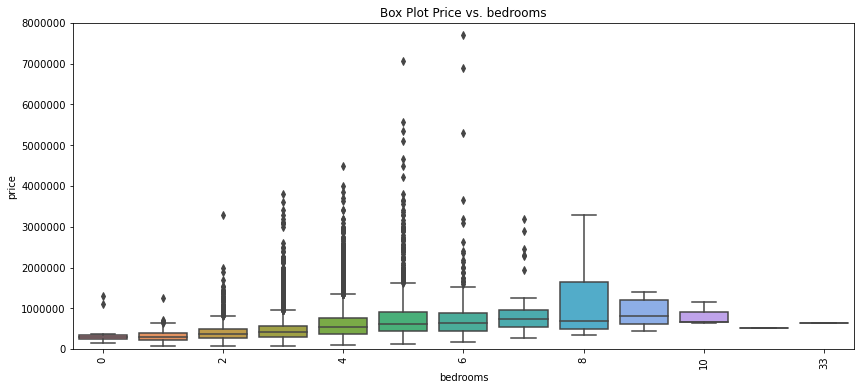

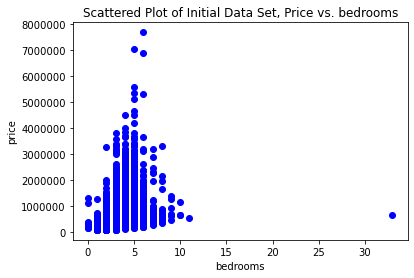

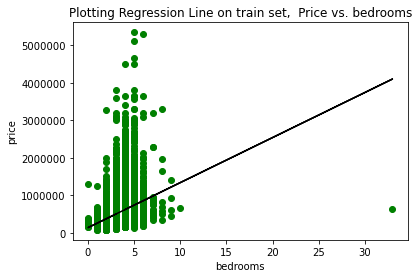

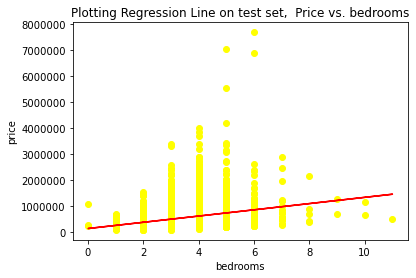

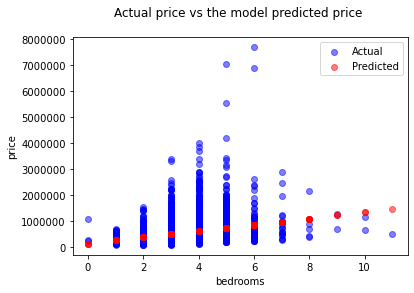

<Figure size 576x432 with 0 Axes>

In [19]:
# with the way the function is declared above , we have to enclose our X and y features in double square brackets 
# to keep it in a dataframe so our function extracts features values and names.
single_feature_model(df[['bedrooms']], df[['price']])

######  here i picked bedroom to see how my model performed , knowing that in the real word that number of bedrooms affects  the price of the house , in this data set my model shows that bedroom as a standalone feature isnt doing a good job predicting the house price, though there is a linear relationship between bedroom and price also the model performed better on the training set than when we tested on the test set . From the boxplot we can see a number of outliers in the bedrrom feature which can be affecting our model, note there is a house with 33 bedroom which has a price range between 0 to about 800 thousand dollars,  this shows that there might be other features that can be added to bedroom to help our model in understanding the weight of bedroom in this dataset , such as grade , bathrooms , view etc

intercept: [25302.75621679]
coefficient: [[243536.50254314]]
training data_score using lm.score: 0.2703 

test_data set score using lm.score: 0.2851 

Coefficient of Determination (R2_score) using r2_score: 0.2851 

Mean Squared error: 103316332478.78762817 



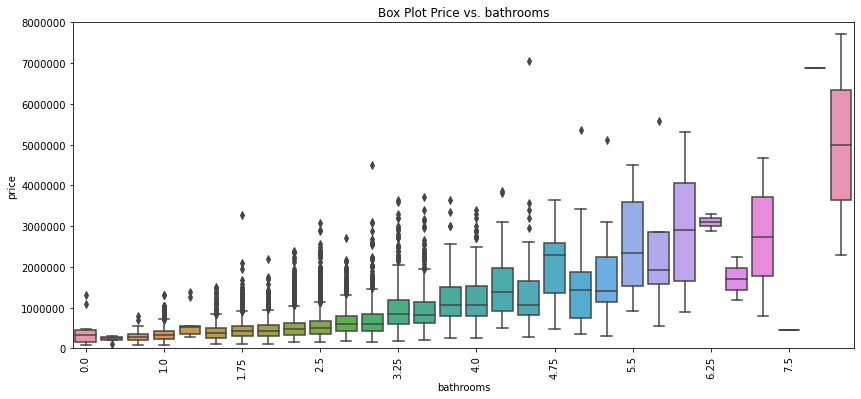

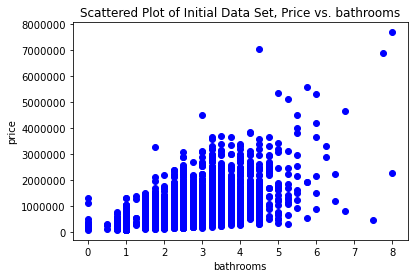

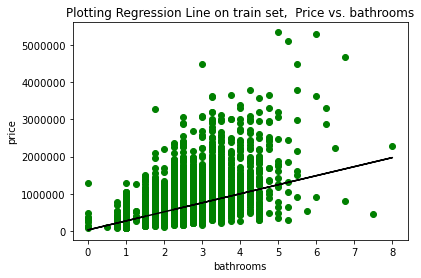

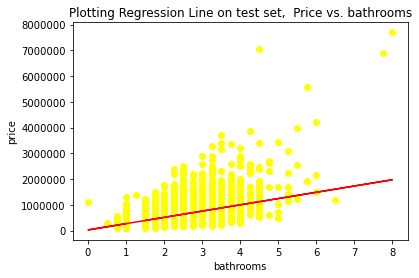

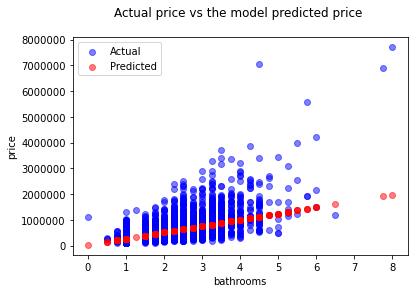

<Figure size 576x432 with 0 Axes>

In [20]:
single_feature_model(df[['bathrooms']], df[['price']])
# with the way the function is declared above , we have to enclose our X and y features in double square brackets 
# to keep it in a dataframe so our function extracts features values and names .

###### we can note that bathrooms performed much better than bedroom as a standalone feature in predicting house prices in this dataset, this is backed up by our correlation matrix which shows that bathrooms has a higher correlation than bedrooms against price. our model here performed better on our testing set than it did on the training set which is a good thing 


###### Below we have more features listed that we ran to better understand simple models but now commented out for the sake of making our code shorter

In [21]:
# single_feature_model(df[['grade']], df[['price']])

#single_feature_model(df[['sqft_living']], df[['price']])

# single_feature_model(df[['yr_built']], df[['price']])

# single_feature_model(df[['view']], df[['price']])

# single_feature_model(df[['sqft_lot']], df[['price']])

# single_feature_model(df[['yr_renovated']], df[['price']])

# single_feature_model(df[['long']], df[['price']])

## 5.2 - Moving on to two features model for this data 

#### i - We will create a function that will make our code or set of algorithm reusable to try out price against different two features to see how our model performs. 

#### ii - I called this function the ' two features regression' , because i am creating this algorithm to take two input features or variables as our X  and target variable (price) as our y. 

#### iii - It follows standard linear regression process , but with the help of visualisation to better understand the model

#### iv - the full dataset will be visualised, also the full data set with the regression plane visualisation , this will be done for the training and testing data set also.

In [22]:
def two_features_regression(X, y):
    
    # Get the column names of x and y
    X1_column = X.columns[0]
    X2_column = X.columns[1]
    y_column = y.columns[0]  
    
    
    # Split the input data into training and testing sets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
    
    # Fit a linear regression model
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # Calculate and print the score for the training data result
    
    train_score = lm.score(X_train, y_train)
    print('Training data score: %.4f' %train_score, '\n')
    
    # Calculate and print the score for the test data result
    test_score = lm.score(X_test, y_test)
    print('Testing data score: %.4f' %test_score, '\n')
    
    # calculate and print the R2_score based upon models prediction on X_test
    r2score = r2_score(y_test, lm.predict(X_test))
    print('Coefficient of determination using R2_score: %.4f' %r2score, '\n')
    
    # calculate and print the mean squared error
    print('Mean Squared error: %.2f' %mean_squared_error(y_test, lm.predict(X_test)), '\n')
    
    # Predict values for the test set
    y_pred = lm.predict(X_test)
    print('Predicted values for y_test based upon X_test set:', '\n', y_pred)
    
#  -------------------------------------------------------------------------------------------------------  

    #  1 - visualize the initial generated dataset in 3D
    
    fig1 = plt.figure(figsize=(15,8))
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.scatter(X[X1_column], X[X2_column], y, color='blue')
    ax1.azim = -60
    ax1.dist = 10
    ax1.elev = 20
    ax1.set_title('Initial Dataset')
    ax1.set_xlabel(X1_column)
    ax1.set_ylabel(X2_column)
    ax1.set_zlabel(y_column)
    fig1.savefig(f'{X1_column}&{X2_column}_full.png')
#   ax1.zaxis.get_major_formatter().set_scientific(False)



#  ------------------------------------------------------------------------------------------------------- 

 #  3 - Visualize the training dataset results for more clarity
    
    fig3 = plt.figure(figsize=(15,8))
    ax3 = fig3.add_subplot(111, projection='3d')
    ax3.scatter(X_train[X1_column], X_train[X2_column], y_train, color='blue')
    
    # Create a meshgrid based on the training data range
    X1, X2 = np.meshgrid(np.linspace(X_train[X1_column].min(), X_train[X1_column].max(), 80), 
                         np.linspace(X_train[X2_column].min(), X_train[X2_column].max(), 30))
    
    Z = lm.coef_[0][0] * X1 + lm.coef_[0][1] * X2 + lm.intercept_[0]
    ax3.plot_surface(X1, X2, Z, alpha=0.5, color='red')
    
    ax3.azim = -60
    ax3.dist = 10
    ax3.elev = 20
    ax3.set_title('Training Dataset with Regression Plane')
    ax3.set_xlabel(X1_column)
    ax3.set_ylabel(X2_column)
    ax3.set_zlabel(y_column)
    fig3.savefig(f'{X1_column}&{X2_column}_train.png')
#   ax3.zaxis.get_major_formatter().set_scientific(False)

#  -------------------------------------------------------------------------------------------------------  

    #  4 - Visualize the test dataset results
    
    fig4 = plt.figure(figsize=(15,8))
    ax4 = fig4.add_subplot(111, projection='3d')
    ax4.scatter(X_test[X1_column], X_test[X2_column], y_test, color='green')
    
    # Create a meshgrid based on the training data range
    X1, X2 = np.meshgrid(np.linspace(X_train[X1_column].min(), X_train[X1_column].max(), 80), 
                         np.linspace(X_train[X2_column].min(), X_train[X2_column].max(), 30))
    
    Z = lm.coef_[0][0] * X1 + lm.coef_[0][1] * X2 + lm.intercept_[0]
    ax4.plot_surface(X1, X2, Z, alpha=0.5, color='red')
    
    ax4.azim = -60
    ax4.dist = 10
    ax4.elev = 20
    ax4.set_title('Test Dataset with Regression Plane')
    ax4.set_xlabel(X1_column)
    ax4.set_ylabel(X2_column)
    ax4.set_zlabel(y_column)
#   ax4.zaxis.get_major_formatter().set_scientific(False)
    fig4.savefig(f'{X1_column}&{X2_column}_test.png')
    



Training data score: 0.4889 

Testing data score: 0.5003 

Coefficient of determination using R2_score: 0.5003 

Mean Squared error: 72211798793.04 

Predicted values for y_test based upon X_test set: 
 [[ 359302.31860953]
 [1233417.20962352]
 [ 366868.49250158]
 ...
 [ 478009.27911761]
 [ 291936.23550423]
 [ 258141.69245355]]


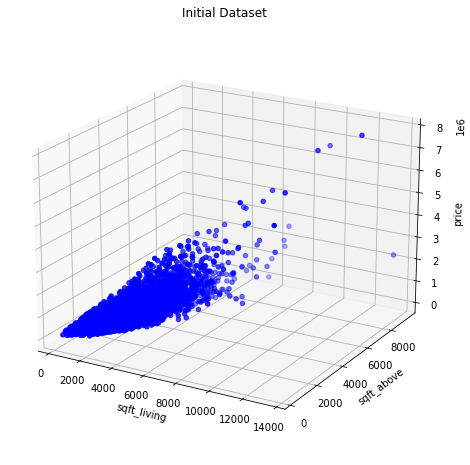

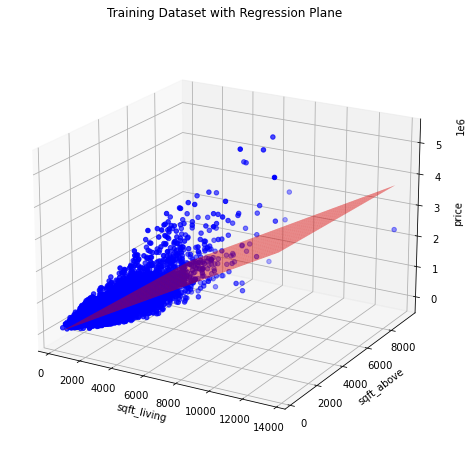

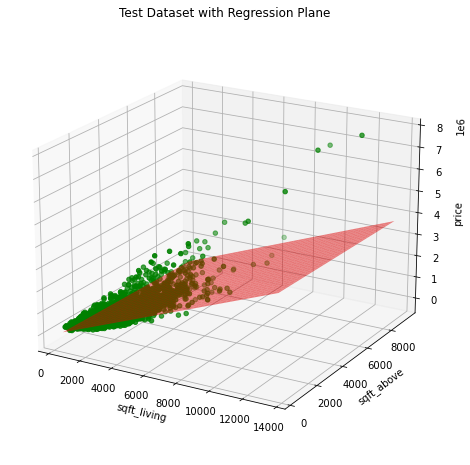

In [23]:
# To better understand what i feed in as my input i break the code down 

# X = df[['bathrooms', 'bedrooms']] # this our two features in X
# y = df[['price']]  # this is our target variable 

# two_features_regression(X, y) my custom function takes in X and y as input 

two_features_regression(df[['sqft_living', 'sqft_above']], df[['price']] )

Training data score: 0.2731 

Testing data score: 0.2851 

Coefficient of determination using R2_score: 0.2851 

Mean Squared error: 103321044589.33 

Predicted values for y_test based upon X_test set: 
 [[367252.98586647]
 [814941.30817809]
 [195898.49596844]
 ...
 [481489.31246516]
 [367252.98586647]
 [253016.65926778]]


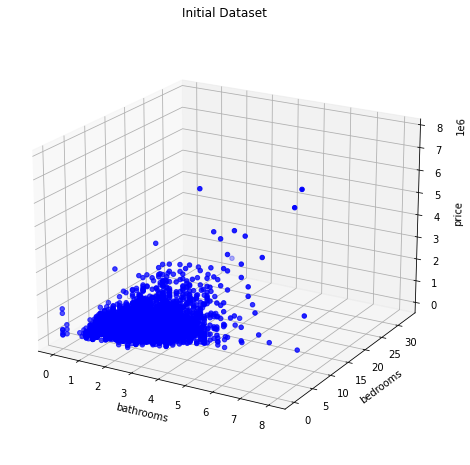

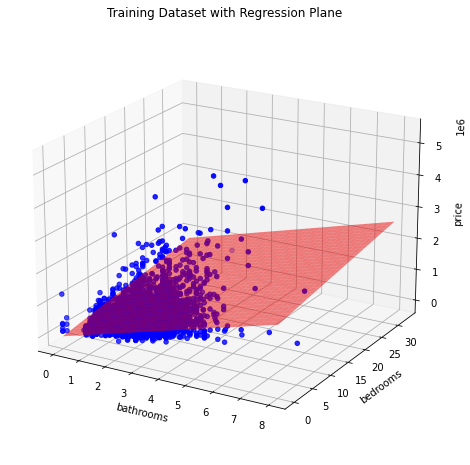

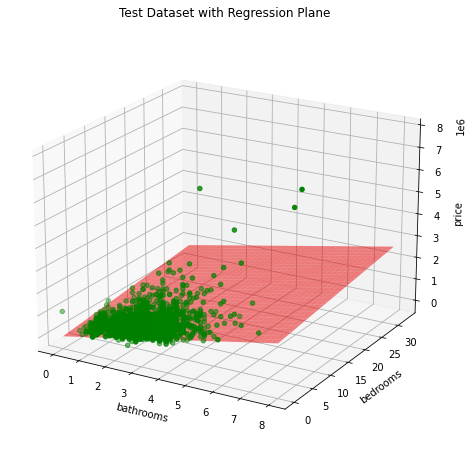

In [24]:
two_features_regression(df[['bathrooms', 'bedrooms']], df[['price']])

In [25]:
# two_features_regression(df[['grade', 'bedrooms']], df[['price']])
# two_features_regression(df[['sqft_living', 'sqft_lot']], df[['price']])

###### We can now see the difference from a single feature predicting the house price is much weaker than when we added a second feature , even though we can observe that some features performed better alone than when we paired them up with some other independent features , this could be that the added new feature do not have a good matrix of prediction with the stand alone feature that performed better 

## 5.3 More Complex Models with more than two input features  
##### with the observation from section 5.2 above we can proceed to try and get a more better performing model by adding more than two input features. we will pick based on the correlation matrix focusing on features with positive correlation

### 5.3.i. five random features with Positive correlation based on price

In [26]:
X = df[['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms' ]] # pick our input
Y = df['price'] # pick our output


# split to train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state =0)

# call and fit our model to the train set
lm = LinearRegression()
lm.fit(X_train,y_train)


# Calculate and print the score for the training data result
train_score = lm.score(X_train, y_train)
print('Training data score: %.4f' %train_score)
    
# Calculate and print the score for the test data result
test_score = lm.score(X_test, y_test)
print('Testing data score: %.4f' %test_score)

# calculate and print the R2_score based upon models prediction on X_test
r2score = r2_score(y_test, lm.predict(X_test))
print('Coefficient of determination using R2_score: %.4f' %r2score)

# calculate the score on test set using .score()
print('Coefficient of Determination (R^2 score) using lm.score:', lm.score(X_test, y_test))

# calculate and print the mean squared error
print('Mean Squared error: %.2f' %mean_squared_error(y_test, lm.predict(X_test)))

Training data score: 0.5428
Testing data score: 0.5458
Coefficient of determination using R2_score: 0.5458
Coefficient of Determination (R^2 score) using lm.score: 0.545844707529573
Mean Squared error: 65634041423.54


### 5.3.ii. Picking Independent variables based on positive correlation matrix score

In [27]:
X = df[['waterfront', 'floors', 'view', 'sqft_basement', 'bedrooms', 'lat', 'long',
        'sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms']]

Y = df['price']

# split to train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state =0)

# call and fit our model to the train set
lm = LinearRegression()
lm.fit(X_train,y_train)


# Calculate and print the score for the training data result
    
train_score = lm.score(X_train, y_train)
print('Training data score: %.4f' %train_score, '\n')
    
# Calculate and print the score for the test data result
test_score = lm.score(X_test, y_test)
print('Testing data score: %.4f' %test_score, '\n')

# calculate and print the R2_score based upon models prediction on X_test
r2score = r2_score(y_test, lm.predict(X_test))
print('Coefficient of determination using R2_score: %.4f' %r2score, '\n')

print('Coefficient of Determination (R^2) using lm.score:', lm.score(X_test, y_test), '\n')

# calculate and print the mean squared error
print('Mean Squared error: %.2f' %mean_squared_error(y_test, lm.predict(X_test)), '\n')

# casting the model predicted y_test values as integer
y_pred_test = lm.predict(X_test).astype(int)

# printing the actual price for y_test and model predicted one by rows to compare
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
y_pred_test = y_pred_test.values if isinstance(y_pred_test, pd.Series) else y_pred_test 

# for i in range(len(y_test)):
#     print(f'Row {i + 1} - y_test: {y_test[i]}, y_pred: {y_pred_test[i]}')

Training data score: 0.6738 

Testing data score: 0.6513 

Coefficient of determination using R2_score: 0.6513 

Coefficient of Determination (R^2) using lm.score: 0.6512799508342815 

Mean Squared error: 50396651831.71 



### 5.3.iii. using all the features in our datasets to predict price

In [28]:
X_final = df.drop(['price'], axis =1) # selecting all features aside price as our independent variables

y_final = df['price'] # selecting price as our target variable

X_final

y_final
# split our data to train and test set
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_final, y_final, test_size=1/3, random_state=42)

# call our model
modelf = LinearRegression()

#fit our model to training set 
modelf.fit(X_trainf, y_trainf)

#checking model performance on train set
print('score on training data: %.2f ' %modelf.score(X_trainf, y_trainf), '\n')
# calculate the intercept
print('Intercept : ', modelf.intercept_, '\n')

# calculate the intercept
print('Coefficients : ', modelf.coef_, '\n')

# calculate and print the R2_score based upon models prediction on X_test
r2score = r2_score(y_testf, modelf.predict(X_testf))
print('Coefficient of determination using R2_score on test data: %.2f' %r2score, '\n')

# calculate and print the mean squared error
print('Mean Squared error: %.8f' %mean_squared_error(y_testf, modelf.predict(X_testf)))

score on training data: 0.70  

Intercept :  7227057.055700949 

Coefficients :  [-3.20364006e+04  4.12010343e+04  1.07030815e+02  1.10920127e-01
  9.31254012e+03  5.19115610e+05  5.61249143e+04  2.35844971e+04
  9.50858623e+04  6.73052638e+01  3.97255511e+01 -2.60121562e+03
  2.19519619e+01 -5.55171982e+02  5.94251243e+05 -1.91565399e+05
  2.13014409e+01 -3.41934704e-01] 

Coefficient of determination using R2_score on test data: 0.70 

Mean Squared error: 45429547306.44368744


### 6. The best performing model i could get is the one below 
##### this was gotten by performing a log transformation on the target variable since we noticed it was positively skewed from checking its distribution 
##### performed same log transformation on the input feature with the highest correlation score with price which is 'sqft_living' because it is also skewed and i needed to give a normal distribution 

In [29]:
# here we can a copy of our dataframe to work on the copied one to avoid messing up our main dataframe used earlier
log_df = df.copy()
log_df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

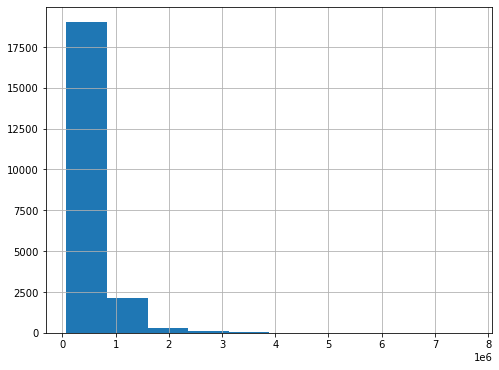

In [30]:
# checking the distribution of price and sqft living before transforming them 
df['price'].hist(figsize=(8,6))

<AxesSubplot:>

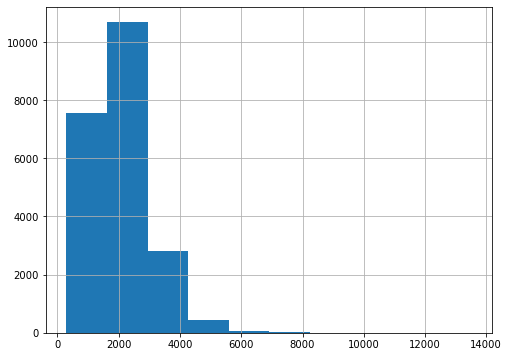

In [31]:
df['sqft_living'].hist(figsize=(8,6))

In [32]:
# performing the log transformation 

log_df['price'] = np.log(log_df['price'])
log_df['sqft_living'] = np.log(log_df['sqft_living'])

<AxesSubplot:>

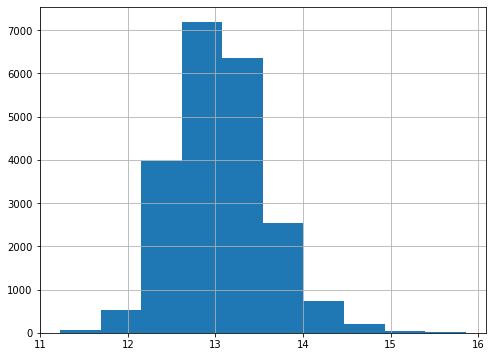

In [33]:
# checking to see how our new distribution is 
log_df['price'].hist(figsize=(8,6))

<AxesSubplot:>

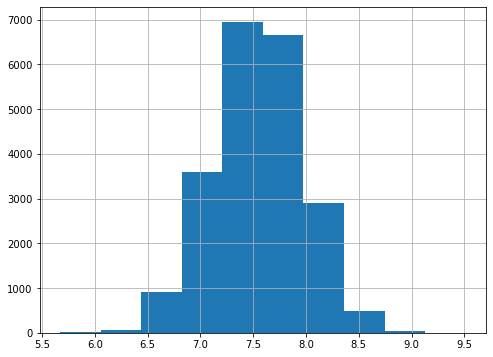

In [34]:
log_df['sqft_living'].hist(figsize=(8,6))

In [35]:
X_log = log_df.drop('price',axis = 1)
y_log = log_df['price']

In [36]:
X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split(X_log, y_log, test_size=1/3, random_state=42)

# random state of 3 gave me 0.77 accuracy while random state of 42 gave me 0.78 accuracy

In [37]:
modellog = LinearRegression()

In [38]:
modellog.fit(X_trainlog, y_trainlog )

LinearRegression()

In [39]:
# calculate and print the R2_score based upon models prediction on X_test
r2score = r2_score(y_testlog, modellog.predict(X_testlog))

print('Coefficient of determination using R2_score: %.2f' % r2score)

Coefficient of determination using R2_score: 0.78


In [40]:
accuracy = modellog.score(X_testlog, y_testlog)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 78%'

In [41]:
print('Coefficient of detrmination: %.2f' % r2_score(y_testlog, modellog.predict(X_testlog)))

# this function takes on the same process above to achieve its coefficient of determination

Coefficient of detrmination: 0.78


In [42]:
print('Mean Squared error: %.8f' % mean_squared_error(y_testlog, modellog.predict(X_testlog)))

Mean Squared error: 0.06356238


In [43]:
# here printing my true value of y and this model predicted value of y

y_pred_testlog = modellog.predict(X_testlog)

y_testlog = y_testlog.values if isinstance(y_testlog, pd.Series) else y_testlog
y_pred_testlog = y_pred_testlog.values if isinstance(y_pred_testlog, pd.Series) else y_pred_testlog 

for i in range(min(20, len(y_test))):
    print(f'Row {i + 1} - y_test: {y_testlog[i]}, y_pred: {y_pred_testlog[i]}')

Row 1 - y_test: 12.80765263256463, y_pred: 12.973279174342931
Row 2 - y_test: 13.670484785914017, y_pred: 13.465708898117114
Row 3 - y_test: 13.854731271117556, y_pred: 14.050072892520785
Row 4 - y_test: 14.214286677921642, y_pred: 14.623565852939489
Row 5 - y_test: 13.474427708785377, y_pred: 13.414139204068558
Row 6 - y_test: 12.259613412458204, y_pred: 12.601803298302915
Row 7 - y_test: 13.579788224443204, y_pred: 13.575138009993164
Row 8 - y_test: 13.42984807715229, y_pred: 13.063518137687407
Row 9 - y_test: 12.859699067927835, y_pred: 12.858872988115735
Row 10 - y_test: 13.312983737012978, y_pred: 12.945531440280671
Row 11 - y_test: 13.366093562326927, y_pred: 13.17816798444677
Row 12 - y_test: 12.86099861326992, y_pred: 13.188787057732192
Row 13 - y_test: 12.072541252905651, y_pred: 12.600639409781781
Row 14 - y_test: 12.80765263256463, y_pred: 12.771320176848988
Row 15 - y_test: 11.982929094215963, y_pred: 12.839002732635713
Row 16 - y_test: 13.883169206438088, y_pred: 13.934066

In [44]:
y_pred_log = y_pred_testlog # My predicted prices in log form

# Performing the back-transformation to get the prices in their original scale
y_pred_original = np.exp(y_pred_log)

In [45]:
y_pred_original

array([ 430748.28559806,  704827.87152385, 1264355.28300527, ...,
        346188.27544461,  275453.90697378,  270398.21261162])

In [46]:
y_log = y_testlog # My true value of  prices (y_test) in log form

# Perform the back-transformation to get the prices in their original scale
y_original = np.exp(y_log)

In [47]:
y_original

array([ 365000.,  865000., 1040000., ...,  363990.,  332000.,  295500.])

In [48]:
# printing the original scale of true prices and predicted prices

y_original = y_original.values if isinstance(y_original, pd.Series) else y_original
y_pred_original = y_pred_original.values if isinstance(y_pred_original, pd.Series) else y_pred_original 

for i in range(min(20, len(y_test))):
    print(f'Row {i + 1} - y_test: {y_original[i]}, y_pred: {y_pred_original[i]}')

Row 1 - y_test: 365000.00000000023, y_pred: 430748.2855980609
Row 2 - y_test: 865000.0000000002, y_pred: 704827.871523847
Row 3 - y_test: 1040000.0000000007, y_pred: 1264355.2830052737
Row 4 - y_test: 1490000.0, y_pred: 2243540.71662191
Row 5 - y_test: 710999.9999999997, y_pred: 669401.4300469025
Row 6 - y_test: 211000.00000000017, y_pred: 297093.8313328341
Row 7 - y_test: 790000.0, y_pred: 786334.8590349398
Row 8 - y_test: 680000.0000000001, y_pred: 471426.3370067005
Row 9 - y_test: 384499.9999999997, y_pred: 384182.50346903974
Row 10 - y_test: 604999.9999999995, y_pred: 418960.29801779246
Row 11 - y_test: 638000.0000000003, y_pred: 528695.5283923306
Row 12 - y_test: 384999.9999999997, y_pred: 534339.6998506626
Row 13 - y_test: 175000.00000000003, y_pred: 296748.24838187254
Row 14 - y_test: 365000.00000000023, y_pred: 351976.6710117062
Row 15 - y_test: 159999.9999999999, y_pred: 376624.041943715
Row 16 - y_test: 1069999.9999999995, y_pred: 1125870.1440906085
Row 17 - y_test: 800000.00

###### without a graphical representation we can go through the values in the rows and we can see how good our model tried to predict the prices which was very close this time around , i can tell it would have done much better if there wasnt alot of outliers in both our features and target variable 

###### On this basis the client is advised to make more addition when collecting its house data , 
###### i. a new feature should be created in support of the bathroom feature that would hold the float numbers in bathroom to mean something as we would want to depict the bathroom as a whole number and if it comes with extra addition we can attach it to this new column so model can read its wieght clearly , it is hard to understand a bathroom of 1 and a bathroom of 0.75 
##### ii. a location feature should be generated to replace the longitude and latitude to help in better understanding of effects of location , which we can turn to label or one hot encoder for our model to better understand the weight of location. 
##### iii. client needs to know that zipcode has no effect on prices of house in king county 

## 7. performing more log transformation on features that have skewed distribution

In [49]:
new_dff2 = df.copy()

In [50]:
new_dff2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [51]:
new_dff2['price'] = np.log(new_dff2['price'])
new_dff2['sqft_living'] = np.log(new_dff2['sqft_living'])
new_dff2['sqft_lot'] = np.log(new_dff2['sqft_lot'])
# at this point accuracy score was still 77 , so lets log transform more 


# new_dff2['waterfront'] = np.log(new_dff2['waterfront']) logging this transforms my data set with inf in waterfront col
# new_dff2['view'] = np.log(new_dff2['view']) same issue with waterfront
# new_dff2['sqft_basement'] = np.log(new_dff2['sqft_basement']) encounter almost same issue 
# new_dff2['sqft_above'] = np.log(new_dff2['sqft_above']) same issue
# new_dff2['sqft_above'] = np.log((new_dff2['sqft_above'] + 1))



In [52]:
# everything i added no changes 

In [53]:
new_dff2['sqft_above']=np.sqrt((new_dff2['sqft_above']))

In [54]:
new_dff2['sqft_living15']=np.sqrt((new_dff2['sqft_living15']))
new_dff2['sqft_lot15']=np.sqrt((new_dff2['sqft_lot15']))

In [55]:
new_dff2['sqft_basement']=np.sqrt((new_dff2['sqft_basement']))

In [56]:
new_dff2['lat']=np.sqrt((new_dff2['lat']))
# new_dff2['long']=np.sqrt((new_dff2['long']))

In [57]:
new_dff2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,7,34.351128,0.000000,1955,0,98178,6.892837,-122.257,36.606010,75.166482
1,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,3,7,46.583259,20.000000,1951,1991,98125,6.908039,-122.319,41.109610,87.401373
2,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,6,27.748874,0.000000,1933,0,98028,6.909262,-122.233,52.153619,89.788641
3,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,32.403703,30.166206,1965,0,98136,6.893533,-122.393,36.878178,70.710678
4,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,8,40.987803,0.000000,1987,0,98074,6.900493,-122.045,42.426407,86.619859


In [58]:
X_more = new_dff2.drop(['price'], axis = 1)
y_more = new_dff2['price']

In [59]:
X_trainmore, X_testmore, y_trainmore, y_testmore = train_test_split(X_more, y_more , test_size = 1/3, random_state = 42)

In [60]:
moremodel = LinearRegression()
moremodel.fit(X_trainmore, y_trainmore)

LinearRegression()

In [61]:
print('Coefficient of detrmination: %.2f' % r2_score(y_testmore, moremodel.predict(X_testmore)))

# this function takes on the same process above to achieve its coefficient of determination

Coefficient of detrmination: 0.78


In [62]:
print('Mean Squared error: %.8f' % mean_squared_error(y_testmore, moremodel.predict(X_testmore)))

Mean Squared error: 0.06337498


In [63]:
# still got same result as my best performing model too 

## 8. Decided to do a standard and Min scaler transformation to the full dataset

In [64]:
df_full = df.copy()

In [65]:
df_full.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
# scaler = StandardScaler()

scaler2 = MinMaxScaler()

In [67]:
# df_full_scale = scaler.fit_transform(df_full)

df_full_scale = scaler2.fit_transform(df_full)

In [68]:
df_full_scale = pd.DataFrame(df_full_scale, columns=df_full.columns)

In [69]:
df_full_scale.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [70]:
X_full = df_full_scale.drop(['price'], axis =1)
y_full = df_full_scale['price']

In [71]:
X_trainfull, X_testfull, y_trainfull, y_testfull = train_test_split(X_full, y_full,test_size = 1/3, random_state = 42)

In [72]:
fullmodel = LinearRegression()
fullmodel.fit(X_trainfull, y_trainfull)

LinearRegression()

In [73]:
print('Coefficient of detrmination: %.2f' % r2_score(y_testfull, fullmodel.predict(X_testfull)))

# this function takes on the same process above to achieve its coefficient of determination

Coefficient of detrmination: 0.70


In [74]:
# here i still  had same score with when i used all features without performing any preprocessing function on them 

## 9. This part teaches how i learnt to use SelectKbest function to pick features according to importance to price prediction 
#####  here im trying to find the basis for my feature selection and i also noticed this picked the features closely on also how i did from looking at the correlation matrix.

In [75]:
new_df = df.copy()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Define X and y
X2 = new_df.drop(['price'],axis=1)
y2 = new_df['price']

# Specify the number of features you want to select (k)
k = 18

# Initialize SelectKBest with the scoring function and k
selector = SelectKBest(score_func=f_regression, k=k)

# Fit and transform the selector
X_new = selector.fit_transform(X2, y2)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X2.columns[selected_indices]

print("Selected feature names:")
for i, feature_name in enumerate(selected_feature_names):
    print(f"{i + 1}. {feature_name}")

print('\n')

# -- the ones i added by my self to see how it selects it by rank

# Get the names of all features and their corresponding scores
all_feature_names = X2.columns[selected_indices]
all_feature_scores = -np.log10(selector.scores_[selected_indices])

# Sort the features by score in descending order and get their indices
# sorted_indices = np.argsort(all_feature_scores)[::-1]

# Sort the selected features by score in ascending order and get their indices
sorted_indices = np.argsort(all_feature_scores)

print("Selected feature names by rank:")
for rank, idx in enumerate(sorted_indices[:k]):
    print(f"{rank + 1}. {all_feature_names[idx]}")   

Selected feature names:
1. bedrooms
2. bathrooms
3. sqft_living
4. sqft_lot
5. floors
6. waterfront
7. view
8. condition
9. grade
10. sqft_above
11. sqft_basement
12. yr_built
13. yr_renovated
14. zipcode
15. lat
16. long
17. sqft_living15
18. sqft_lot15


Selected feature names by rank:
1. sqft_living
2. grade
3. sqft_above
4. sqft_living15
5. bathrooms
6. view
7. sqft_basement
8. bedrooms
9. lat
10. waterfront
11. floors
12. yr_renovated
13. sqft_lot
14. sqft_lot15
15. yr_built
16. zipcode
17. condition
18. long


### 8.1 comparing the result above with my correlation matrix rank

In [76]:
correlation_matrix = new_df.corr()
# Examine the correlations with 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
price_correlations

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
zipcode         -0.053168
Name: price, dtype: float64

In [77]:
#8.1 correlation rank seems to have a good outcome as the selectkbest